<a href="https://colab.research.google.com/github/jb00753/Data-Analytics-Project1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
#
Link to my Github repository: https://github.com/jb00753/Data-Analytics-Project1
##
I selected a data set from Kaggle titled: Car_Sales_Info. This data covers car sales, trends, and prices that the cars sold for.

My question to answer during the course of this project is: "What are the most significant factors that influence used cars prices?

 My sub-questions are:
 1. "How does car age and mileage affect vehicle prices and which factor has a stronger impact on the vehicles depriciation".
 2. "Which car manufacturers retain their value the best over time?"
 3. "How does fuel type influence the price of the car?"



#Describe the Data

The data set used in this project was found on Kaggle.
The link to the dataset is: https://www.kaggle.com/datasets/minahilfatima12328/car-sales-info

The dataset has 5000 rows and 7 columns.

The columns are: Manufacturer, Model, Engine Size, Fuel Type, Year of Manufacture, Mileage, Price.

In [2]:
# Part 1

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/car_sales_data.csv')
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [3]:
# Part 2: Data Cleaning
#Describe the data
print(df.describe)

print()
print()
#Find missing values
print("Missing values in each column:")
print(df.isnull().sum())

#Find null values
print()
print()
print("Null values in each column:")
print(df.isna().sum())

<bound method NDFrame.describe of       Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0             Ford      Fiesta          1.0    Petrol                 2002   
1          Porsche  718 Cayman          4.0    Petrol                 2016   
2             Ford      Mondeo          1.6    Diesel                 2014   
3           Toyota        RAV4          1.8    Hybrid                 1988   
4               VW        Polo          1.0    Petrol                 2006   
...            ...         ...          ...       ...                  ...   
49995          BMW          M5          5.0    Petrol                 2018   
49996       Toyota       Prius          1.8    Hybrid                 2003   
49997         Ford      Mondeo          1.6    Diesel                 2022   
49998         Ford       Focus          1.0    Diesel                 2016   
49999           VW        Golf          1.4    Diesel                 2012   

       Mileage   Price  
0   

In [4]:
#Continuing the data cleaning process

#Check for duplicates
print("Duplicate rows in the dataset:")
print(df.duplicated().sum())
print()

print(df[df.duplicated()])
print()
print()

#Remove duplicates
df.drop_duplicates(inplace=True)
print("Dataset after removing duplicates:")
print(df)

Duplicate rows in the dataset:
12

      Manufacturer   Model  Engine size Fuel type  Year of manufacture  \
5426            VW    Polo          1.2    Petrol                 2003   
9862          Ford  Mondeo          1.4    Diesel                 1987   
14745          BMW      Z4          2.4    Petrol                 1999   
19020       Toyota   Yaris          1.0    Petrol                 1996   
19337           VW    Polo          1.0    Petrol                 2000   
23927           VW    Polo          1.2    Petrol                 2021   
25368           VW    Golf          1.2    Diesel                 2011   
28576           VW    Polo          1.2    Petrol                 2003   
34246           VW  Passat          2.0    Diesel                 2003   
35647         Ford   Focus          1.6    Petrol                 2019   
41536           VW  Passat          1.8    Diesel                 1996   
45904         Ford  Fiesta          1.2    Petrol                 2003   

  

In [5]:
#Check the data types to ensure they are correct
print("Current data types:")
print(df.dtypes)
print("Detailed info:")
df.info()

Current data types:
Manufacturer            object
Model                   object
Engine size            float64
Fuel type               object
Year of manufacture      int64
Mileage                  int64
Price                    int64
dtype: object
Detailed info:
<class 'pandas.core.frame.DataFrame'>
Index: 49988 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         49988 non-null  object 
 1   Model                49988 non-null  object 
 2   Engine size          49988 non-null  float64
 3   Fuel type            49988 non-null  object 
 4   Year of manufacture  49988 non-null  int64  
 5   Mileage              49988 non-null  int64  
 6   Price                49988 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ MB


In [6]:
#Check for unique values in each column

print("Unique values in the categorical columns")
print()
print(df['Manufacturer'].value_counts())
print()
print(df['Model'].value_counts())
print()
print(df['Fuel type'].value_counts())
print()

print("Unique values in the numerical columns")
print()
print(df['Engine size'].value_counts())
print()
print(df['Year of manufacture'].value_counts())
print()
print(df['Mileage'].value_counts())
print()
print(df['Price'].value_counts())

Unique values in the categorical columns

Manufacturer
Ford       14956
VW         14906
Toyota     12553
BMW         4964
Porsche     2609
Name: count, dtype: int64

Model
Mondeo        5057
Golf          5049
Polo          4988
Focus         4975
Fiesta        4924
Passat        4869
RAV4          4292
Prius         4171
Yaris         4090
Z4            1687
M5            1645
X3            1632
911            872
Cayenne        870
718 Cayman     867
Name: count, dtype: int64

Fuel type
Petrol    25480
Diesel    13264
Hybrid    11244
Name: count, dtype: int64

Unique values in the numerical columns

Engine size
1.4    10059
2.0     7630
1.8     7031
1.0     6341
1.6     5508
1.2     4979
2.4     2363
2.2     1678
3.0     1368
4.0     1092
4.4      559
5.0      525
2.6      448
3.5      407
Name: count, dtype: int64

Year of manufacture
2018    1646
1995    1616
2016    1587
2012    1583
2004    1578
2013    1576
2011    1572
2006    1566
2007    1561
1999    1554
2005    1548
1997  

#Data Cleaning Summary

First, I described the data in order to get a better understanding of what the data looks like.
From there, I checked for missing values. I did not find any missing values. Then I checked for duplicated values. There were 12 duplicate values in the data and I then dropped those. The next step was to check for correct data types. All the data typed were correct. I then began to check for unique values and unique numerical values. Everything seems correct and I did not need to drop or merge any values.

With the data cleaning process completed. I will now move on to creating some graphs based on my questions.

In [7]:
#Part 3: Data Analysis

#Main Question: What are the most significant factors that influence used cars prices?

# Create car age variable
#I did this so that it is easier to understand the age of the car
df['Car_age'] = 2025 - df['Year of manufacture']
print("Car age created.")
print(df[['Year of manufacture', 'Car_age']].head())

print()
print()
#Create a pivot table to show average price by manufacturer and fuel type
pivot1 = df.pivot_table(
    values='Price',
    index='Manufacturer',
    columns='Fuel type',
    aggfunc='mean'
)

print("Average Price by Manufacturer and Fuel Type:")
print(pivot1.round(0))
print()
print()


#Create a pivot table to show average price by manufacturer and car age
pivot2 = df.pivot_table(
    values='Price',
    index='Manufacturer',
    columns='Car_age',
    aggfunc='mean'
)

print("Average Price by Manufacturer and Car Age:")
print(pivot2.round(0))

Car age created.
   Year of manufacture  Car_age
0                 2002       23
1                 2016        9
2                 2014       11
3                 1988       37
4                 2006       19


Average Price by Manufacturer and Fuel Type:
Fuel type      Diesel   Hybrid   Petrol
Manufacturer                           
BMW           18148.0      NaN  26603.0
Ford          12570.0  12600.0   9069.0
Porsche       28247.0      NaN  29205.0
Toyota            NaN  15329.0  10953.0
VW            11924.0  12389.0   9158.0


Average Price by Manufacturer and Car Age:
Car_age             3         4        5        6        7        8        9   \
Manufacturer                                                                    
BMW           102364.0   95226.0  79422.0  74983.0  63523.0  60074.0  54082.0   
Ford           41933.0   38058.0  34593.0  32175.0  28238.0  25837.0  22995.0   
Porsche       112659.0  100542.0  90549.0  83890.0  74532.0  67931.0  61574.0   
Toyota        

In [8]:
#Create a pivot table to show average price by manufacturer and mileage
#I tried to use the mileage as it originally was in the dataset, but there were too many missing values and too many groups
#To fix this, I grouped the mileage to make it easier to read
df['Mileage_group'] = pd.cut(df['Mileage'], bins=[0, 25000, 75000, 150000, 500000],
                             labels=['Low (0-25k)', 'Medium (25-75k)', 'High (75-150k)', 'Very High (150k+)'])

#Now, with the mileage grouped, I created a pivot table
pivot3 = df.pivot_table(
    values='Price',
    index='Manufacturer',
    columns='Mileage_group',
    aggfunc='mean'
)

print("Average Price by Manufacturer and Mileage Group:")
print(pivot3.round(0))

Average Price by Manufacturer and Mileage Group:
Mileage_group  Low (0-25k)  Medium (25-75k)  High (75-150k)  Very High (150k+)
Manufacturer                                                                  
BMW                74495.0          41622.0         15802.0             4207.0
Ford               31246.0          18327.0          6860.0             1899.0
Porsche            83296.0          49112.0         18714.0             5122.0
Toyota             41527.0          24282.0          9032.0             2506.0
VW                 30922.0          17978.0          6706.0             1857.0


/tmp/ipython-input-2647457602.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot3 = df.pivot_table(


In [9]:
#Create a pivot table to show average price by manufacturer and engine size
pivot4 = df.pivot_table(
    values='Price',
    index='Manufacturer',
    columns='Engine size',
    aggfunc='mean'
)

print("Average Price by Manufacturer and Engine Size:")
print(pivot4.round(0))

Average Price by Manufacturer and Engine Size:
Engine size       1.0     1.2      1.4      1.6      1.8      2.0      2.2  \
Manufacturer                                                                 
BMW               NaN     NaN      NaN      NaN      NaN  14818.0  16054.0   
Ford           7695.0  7004.0  10150.0  12506.0  13015.0  13643.0      NaN   
Porsche           NaN     NaN      NaN      NaN      NaN  17830.0  32743.0   
Toyota        10193.0  9284.0  12059.0      NaN  17292.0  19280.0  19730.0   
VW             6672.0  8271.0   9858.0  10596.0  12107.0  11893.0      NaN   

Engine size       2.4      2.6      3.0      3.5      4.0      4.4      5.0  
Manufacturer                                                                 
BMW           17196.0      NaN  18524.0      NaN  36968.0  40211.0  42737.0  
Ford              NaN      NaN      NaN      NaN      NaN      NaN      NaN  
Porsche       20819.0  31551.0  32660.0  37003.0  27512.0      NaN      NaN  
Toyota        20

In [10]:
#Checking to find out where the null values are

#First, I am going to check for NaN values in the current dataframe
print("NaN values in current dataframe:")
print(df.isnull().sum())
print()
# Now, I am going to check specifically in pivot tables to see where the NaN values are
print("NaN values in pivot1 (Manufacturer vs Fuel Type):")
print(pivot1.isnull().sum())
print()
print("NaN values in pivot2 (Manufacturer vs Car Age):")
print(pivot2.isnull().sum())
print()
print("NaN values in pivot3 (Manufacturer vs Mileage Group):")

print(pivot3.isnull().sum())
print()
print("NaN values in pivot4 (Manufacturer vs Engine Size):")
print(pivot4.isnull().sum())

NaN values in current dataframe:
Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
Car_age                0
Mileage_group          0
dtype: int64

NaN values in pivot1 (Manufacturer vs Fuel Type):
Fuel type
Diesel    1
Hybrid    2
Petrol    0
dtype: int64

NaN values in pivot2 (Manufacturer vs Car Age):
Car_age
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

NaN values in pivot3 (Manufacturer vs Mileage Group):
Mileage_group
Low (0-25k)          0
Medium (25-75k)      0
High (75-150k)       0
Very High (150k+)    0
dtype: int64

NaN values in pivot4 (Manufacturer vs Engine Size):
Engine siz

In [11]:

#Even though I cleaned the dataframe, there are still NaN values in the pivot tables
#So I am now going to clean the pivot tables to remove the NaN values
print("CLEANING NaN VALUES IN PIVOT TABLES")
print()

# Check which specific combinations are missing
print("Missing combinations in pivot1:")
print("Diesel NaN for:", pivot1[pivot1['Diesel'].isna()].index.tolist())
print("Hybrid NaN for:", pivot1[pivot1['Hybrid'].isna()].index.tolist())

print("Missing combinations in pivot4:")
for engine_size in pivot4.columns:
    missing_manufacturers = pivot4[pivot4[engine_size].isna()].index.tolist()
    if missing_manufacturers:
        print(f"Engine size {engine_size} missing for: {missing_manufacturers}")

# Clean pivot1: Replace NaN with 0 (meaning no cars of that fuel type exist)
print("Cleaning pivot1")
print("Before cleaning:", pivot1.isnull().sum().sum(), "NaN values")
pivot1_clean = pivot1.fillna(0)
print("After cleaning:", pivot1_clean.isnull().sum().sum(), "NaN values")

# Clean pivot4: Replace NaN with 0 (meaning no cars of that engine size exist)
print("Cleaning pivot4")
print("Before cleaning:", pivot4.isnull().sum().sum(), "NaN values")
pivot4_clean = pivot4.fillna(0)
print("After cleaning:", pivot4_clean.isnull().sum().sum(), "NaN values")

# Update the original pivot tables
pivot1 = pivot1_clean
pivot4 = pivot4_clean



CLEANING NaN VALUES IN PIVOT TABLES

Missing combinations in pivot1:
Diesel NaN for: ['Toyota']
Hybrid NaN for: ['BMW', 'Porsche']
Missing combinations in pivot4:
Engine size 1.0 missing for: ['BMW', 'Porsche']
Engine size 1.2 missing for: ['BMW', 'Porsche']
Engine size 1.4 missing for: ['BMW', 'Porsche']
Engine size 1.6 missing for: ['BMW', 'Porsche', 'Toyota']
Engine size 1.8 missing for: ['BMW', 'Porsche']
Engine size 2.2 missing for: ['Ford', 'VW']
Engine size 2.4 missing for: ['Ford', 'VW']
Engine size 2.6 missing for: ['BMW', 'Ford', 'Toyota', 'VW']
Engine size 3.0 missing for: ['Ford', 'Toyota', 'VW']
Engine size 3.5 missing for: ['BMW', 'Ford', 'Toyota', 'VW']
Engine size 4.0 missing for: ['Ford', 'Toyota', 'VW']
Engine size 4.4 missing for: ['Ford', 'Porsche', 'Toyota', 'VW']
Engine size 5.0 missing for: ['Ford', 'Porsche', 'Toyota', 'VW']
Cleaning pivot1
Before cleaning: 3 NaN values
After cleaning: 0 NaN values
Cleaning pivot4
Before cleaning: 37 NaN values
After cleaning: 0

<Figure size 1000x600 with 0 Axes>

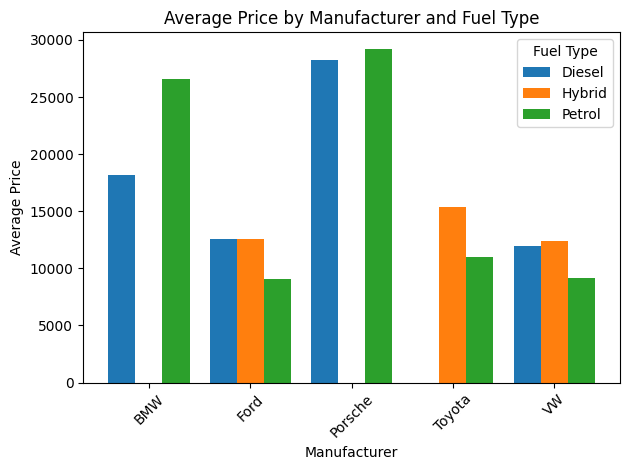

In [12]:
# Graph 1: Manufacturer vs Fuel Type (from pivot1)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pivot1.plot(kind='bar', width=0.8)
plt.title('Average Price by Manufacturer and Fuel Type')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The first graph shows price vs. fuel type. I decided to stick with a bar graph for this data because it is comparing categorical information. In this graph, there is no clear trend. For some manufacturers, petrol vehicles were cheaper. For other brands, they were more expensive than other fuels. Judging by the data shown in this graph, I would conclude that fuel type does not have a drastic impact on the price of a vehicle.

This graph helps me answer my 3rd sub-question which is: How much does fuel type influence the price of a car?

Looking at graph #1, we can see that fuel type does not seem to influence the price of a car very much. Across all brands, the type of fuel may influence the price slightly. However, it is not enough of an influence to be considered a "significant factor" in the cost of the vehicle. For example, with brands like Toyota and Ford, diesal and hybrid vehicles cost more than petrol, but only by a few thousand dollars.

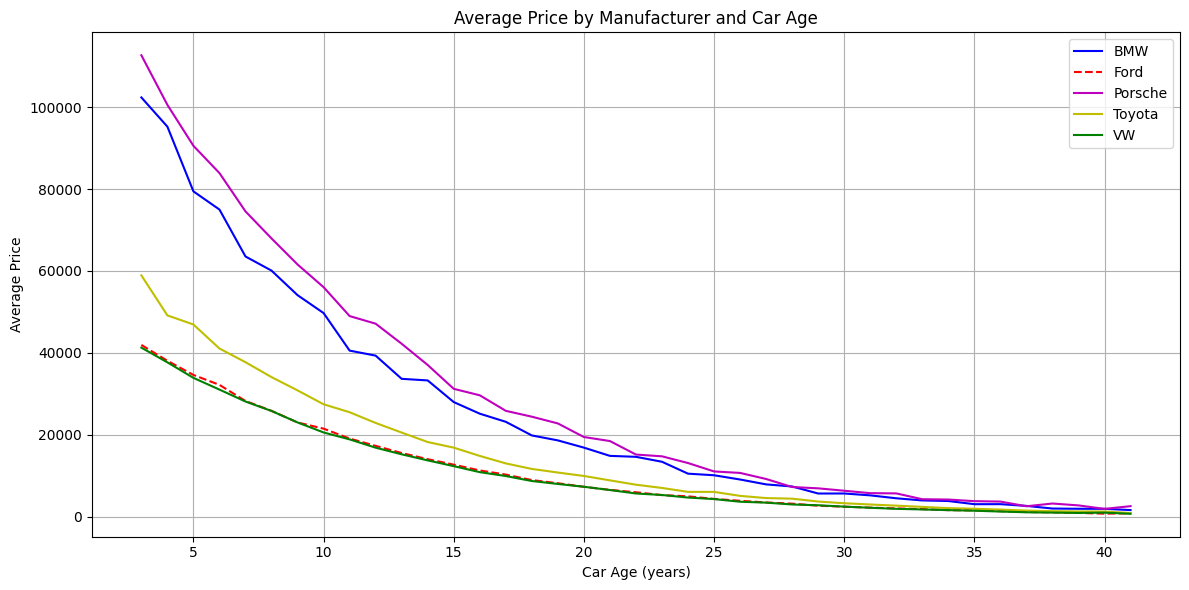

In [33]:
# Graph 2: Line graph (from pivot2)
plt.figure(figsize=(12, 6))

bmw_prices = pivot2.loc['BMW']
ford_prices = pivot2.loc['Ford']
porsche_prices = pivot2.loc['Porsche']
toyota_prices = pivot2.loc['Toyota']
vw_prices = pivot2.loc['VW']

plt.plot(bmw_prices, 'b-', label='BMW')
plt.plot(ford_prices, 'r--', label='Ford')
plt.plot(porsche_prices, 'm-', label='Porsche')
plt.plot(toyota_prices, 'y-', label='Toyota')
plt.plot(vw_prices, 'g', label='VW')

plt.title('Average Price by Manufacturer and Car Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The second graph depicts price versus car age. I double checked my data and found that Ford and VW are almost overlapping because they are very similar in price. I used a red-dashed line for Ford to differentiate between the two. This graph shows a clear trend and it points toward car age being one of the most significant factors to influence price. The graph clearly shows that no matter the brand of car, as the car ages, the price decreases.

This graph also helps me answer my 2nd sub-question which is "Which car brand holds their value the best?". BMW and Porsche decrease in value less than the other brands over time and are therefore better at retaining their value.

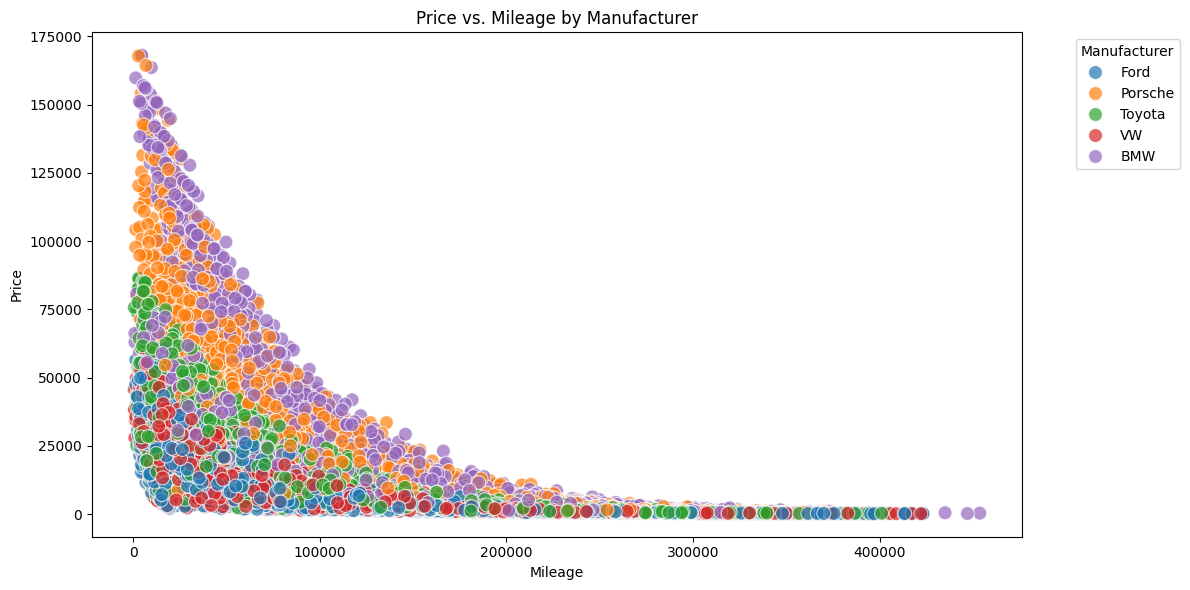

<Figure size 1000x600 with 0 Axes>

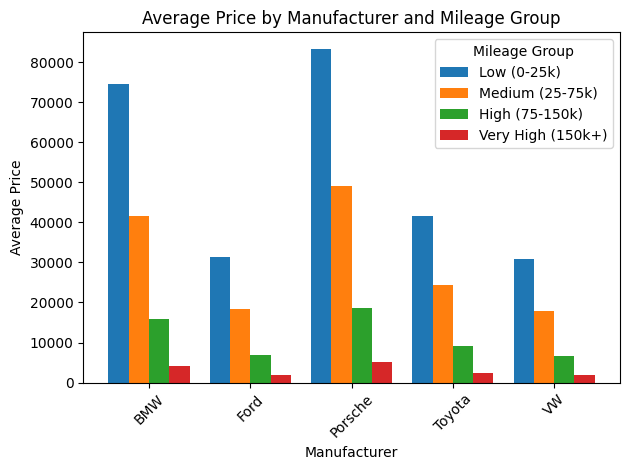

In [15]:
# Graph 3: Manufacturer vs Mileage Group (from pivot3)
import seaborn as sns
plt.figure(figsize=(12,6))

# Scatterplot
#I removed the groupings I made so that we could see the complete data
sns.scatterplot(data=df,
                x="Mileage",
                y="Price",
                hue="Manufacturer",
                alpha=0.7,
                s=100)


plt.title("Price vs. Mileage by Manufacturer")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

pivot3.plot(kind='bar', width=0.8)
plt.title('Average Price by Manufacturer and Mileage Group')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.legend(title='Mileage Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
#Correlation Coefficients to determine which variables are most important
print("Car Data Correlations:")
print(f"Car Age vs Price: {df['Car_age'].corr(df['Price']):.3f}")
print(f"Mileage vs Price: {df['Mileage'].corr(df['Price']):.3f}")

Car Data Correlations:
Car Age vs Price: -0.714
Mileage vs Price: -0.633


I chose to do two different graphs for this data. In the first graph, I did a scatterplot. This is so that we can get a picture of the entire data. Since it is a little difficult to interpret with so many datapoints, I also grouped the mileage into groups so that we could visualize it a bit clearer. The first graph shows a definate decline in price as the mileage increases. It is most obvious in the more expensive brands. In the second graph, I grouped the datapoints in to categories to make it easier to read. This helps us see the less expensive brands better compared to the first graph. The result is the same in this graph, the price decreases as the mileage increases.

These graphs here can be used to answer my 2nd sub-question, "What car brands hold there value the best?". BMW and Porsche remain more expensive over time and are therefore better at holding their value.

#
I also used this graph to determine the answer to my first sub-question: "How does car age and mileage affect vehicle prices and which has a stronger impact on depreciation?" Both the graph on car age vs. price and mileage vs. price showed a strong impact on depreciation. To determine which was stronger, I used the correlation coefficient. The result showed that car age vs. price had the biggest impact on depreciation.

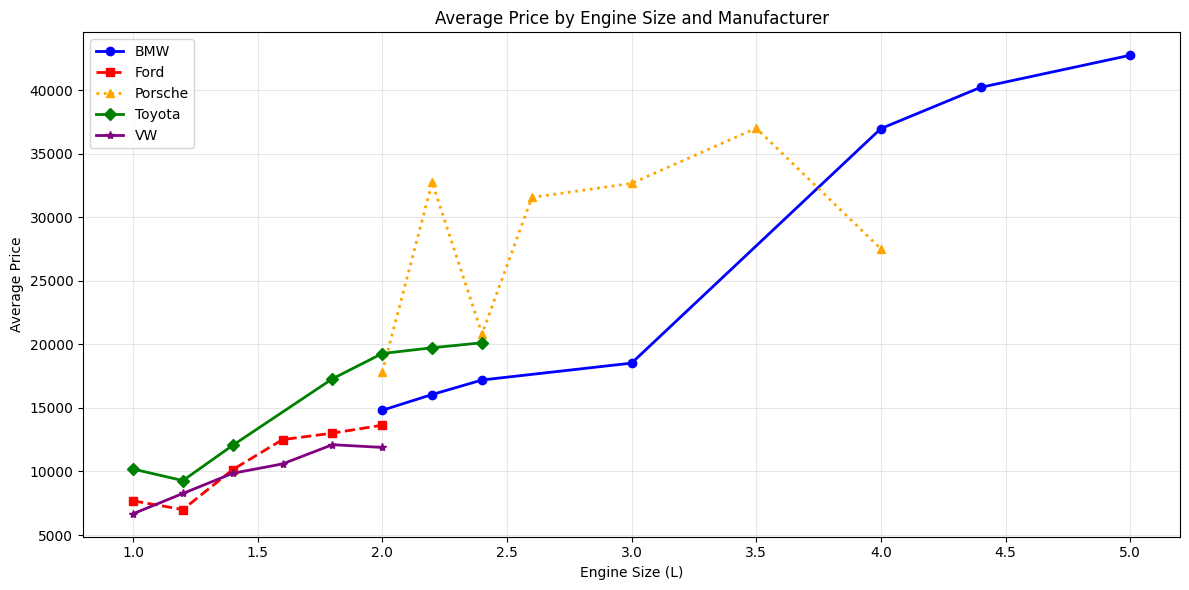

In [29]:


# Graph 4: Line graph for Engine Size vs Price by Manufacturer
plt.figure(figsize=(12, 6))

# Calculate average price for each engine size by manufacturer
manufacturers = ['BMW', 'Ford', 'Porsche', 'Toyota', 'VW']
colors = ['blue', 'red', 'orange', 'green', 'purple']
styles = ['-', '--', ':', '-', '-']
markers = ['o', 's', '^', 'D', '*']

for mfg, color, style, marker in zip(manufacturers, colors, styles, markers):
    mfg_data = df[df['Manufacturer'] == mfg]
    engine_avg = mfg_data.groupby('Engine size')['Price'].mean()

    plt.plot(engine_avg.index, engine_avg.values,
             color=color, linestyle=style, marker=marker,
             label=mfg, linewidth=2, markersize=6)

plt.title('Average Price by Engine Size and Manufacturer')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This graph compares price by manufacturer to the size of the car engine. I chose this line graph because I feel like it provides the best visual representation of the data. I went back and checked different car brands to see if the data was accurate with having engine sizes like 1.2 and 2.4, etc. It is accurate and car manufacturers do have engine sizes that match what the data is showing. This graph shows that engine size does have an impact on the price. The larger size engines cost more across all brands. However, it does not have as much of an impact on price as other factors, especially among the less expensive car brands.

##Summary
#

The main findings from this data set was that car age and car mileage have a dramatic impact on the price of a used car. Engine size had a positive impact on price, with higher engine sizes resulting in higher costs. Fuel type did not seem to impact price much at all.

#
For my first sub-question, I found that car age and mileage both have a significant impact on the price. As both car age and mileage increase, the price decreases. Using the correlation coefficient, it was determined that car age has the stronger impact on price.
#
For the second sub-question, "Which car manufacturers hold their value best over time?", I found that the luxery brands hold their value best. Mileage and age does not negatively impact BMW and Porsche as much as it does the other brands.
#
Lastly, the third sub-question "How much does fuel type influence the price of the car?". What I found from the data is that fuel type does not have that much of an impact, either positively or negatively, on the price of a car. Across all brands, the difference in price between fuel types was not that drastic.
#
What I did not find in this data is how electric vehicles impact the price of used cars. More and more car manufacturers are producing electric cars and I would like to see how that fuel type would impact the price.
#
I found a few issues with the data. First, the data is from Europe. So I would need to compare these results with a data set from the United States to get a better understanding of the trends here. Also, I think more car brands would be helpful as it would give a better picture of how car values depreciate.